In [1]:
import importlib
import datetime as dt

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from scipy import stats

import plotly.graph_objects as ptly
import plotly.express as px

import waldluft as wl

plt.style.use("janjo-v0-0.mplstyle")

In [461]:
importlib.reload(wl)

<module 'waldluft' from '/Users/Janjo/Documents/MEINE DOKUMENTE/Projects/kaltluftstrom/waldluft.py'>

In [361]:
SENSOR_LABELS = {
    "W1": "W1: Schneise 1",
    "W6": "W6: Ref. Waldrand 1",
    "W7": "W7: Ref. Waldrand 2",
    "W8": "W8: Ref. Quartier",
    "W9": "W9: Ref. Wald",
    "S8": "S8: Ref. Quartier",
    "S9": "S9: Ref. Wald",
}
SENSORS = ("W1", "W2", "W3", "W4", "W5")
REF_SENSORS = ("W6", "W7", "W8", "W9")

In [434]:
inst = wl.Timed("raw_data/220905", encoding="iso8859-1", sensor_labels=SENSOR_LABELS)

Successfully imported the following sensor data:
    WTDL:
        W6
        W7
        W5
        W4
        W1
        W3
        W2
        W9
        W8
    SHT:
        S1  98:2B
        S3  A5:6D
        S2  B1:5B
        S7  79:D0
        S9  CD:A2
        S8  E1:E1


image was saved at playground/None_W6W7W5W4W1W3W2W9W8S1S3S2S7S9S8_size-10-6.pdf


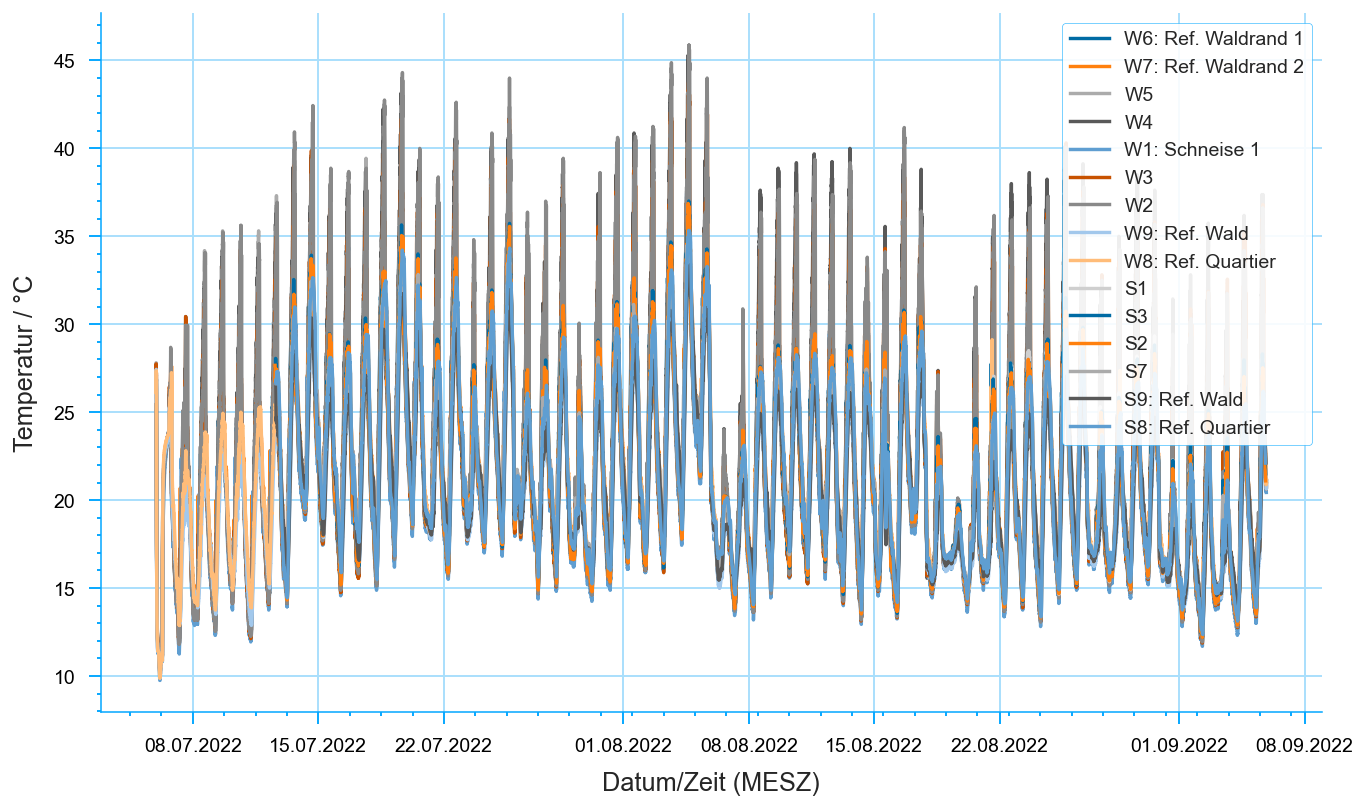

In [222]:
inst.plot_temp_time(file_export=True, file_export_path="playground")

In [462]:
dtd = wl.Dated(inst.timeseries)

In [463]:
dtd.assign_bins(REF_SENSORS)

image was saved at playground/Temperaturabfall_nach_Tages-Referenztemperatur_mit_Regression_W1W2W3W4W5_size-10-6.pdf
image was saved at playground/Temperaturabfall_nach_Tages-Referenztemperatur_mit_Regression_W1W2W3W4W5_size-10-6.png


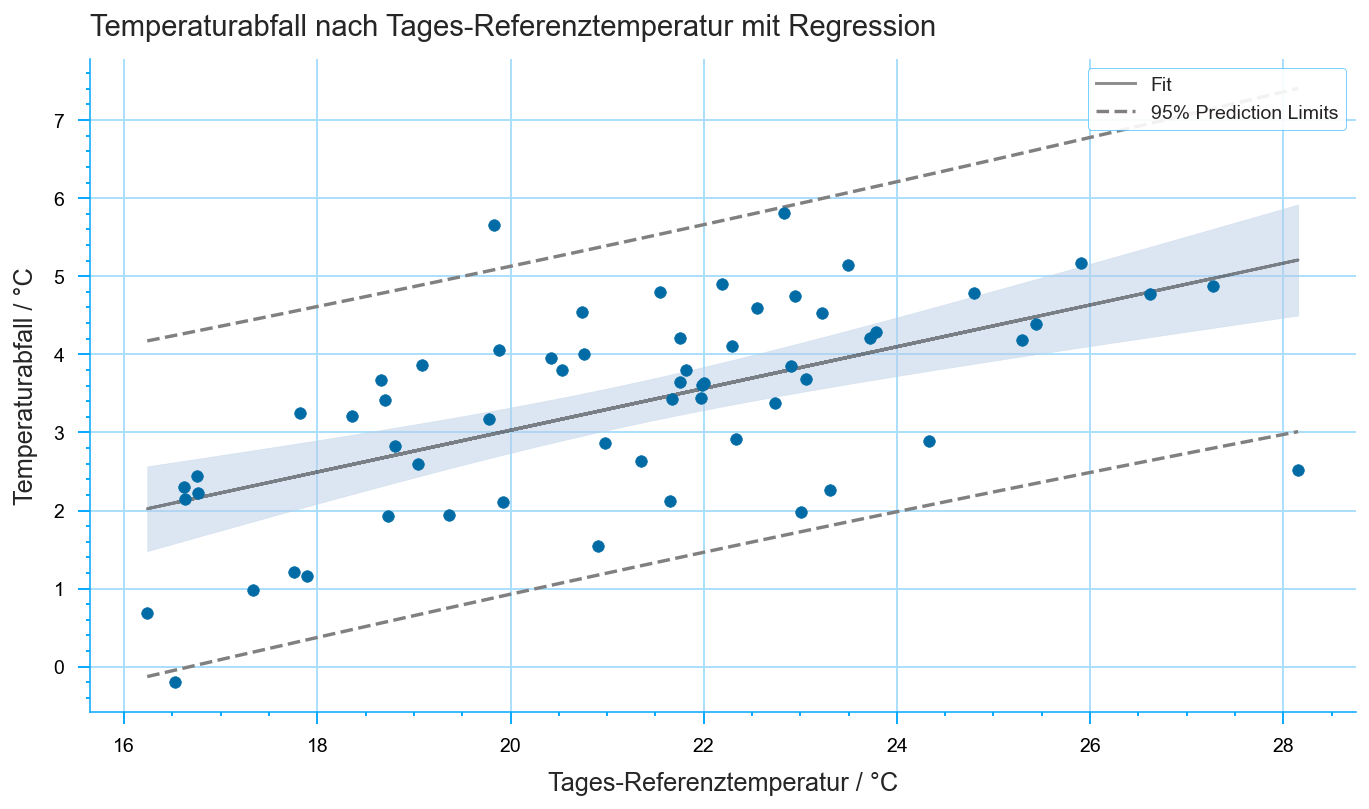

In [471]:
dtd.plot_scatter(
    sensor_manual=SENSORS,
    title="Temperaturabfall nach Tages-Referenztemperatur mit Regression",
    file_export=True,
    file_export_path="playground",
    file_export_type=("pdf", "png"),
)

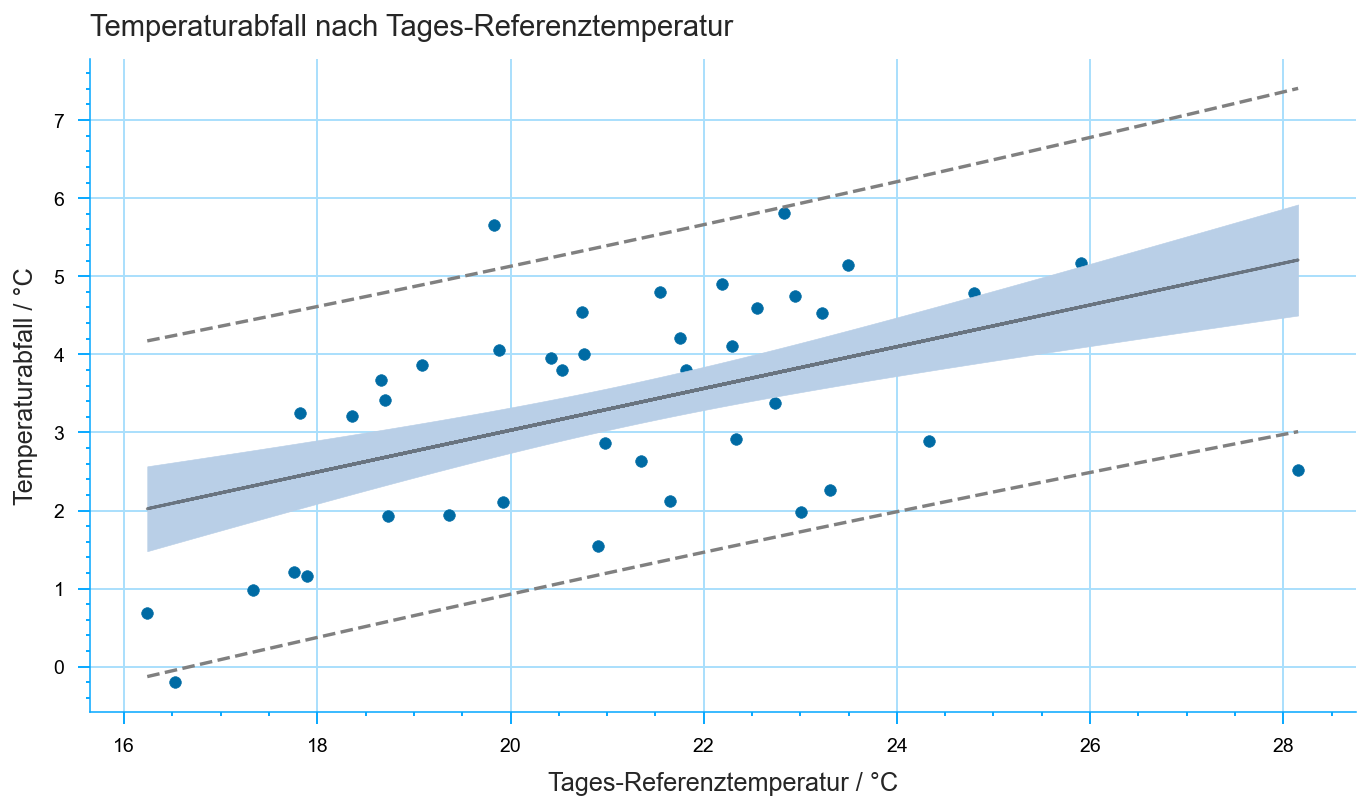

In [424]:
#DON'T UPDATE
dtd.plot_scatter(sensor_manual=SENSORS, title="Temperaturabfall nach Tages-Referenztemperatur")

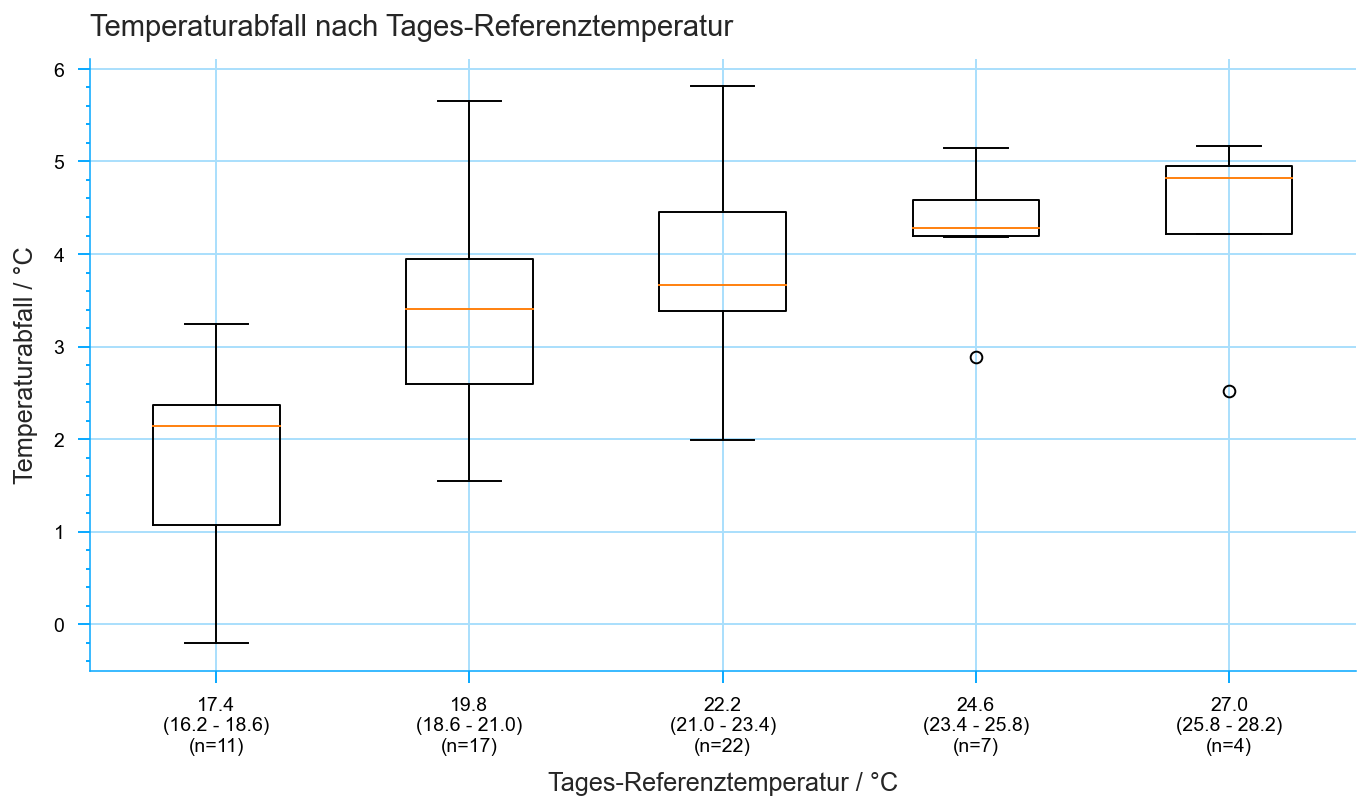

In [352]:
dtd.plot_t_drop(
    sensor_manual=SENSORS,
    #frames=("27-1", "21-1"),
    title="Temperaturabfall nach Tages-Referenztemperatur",
)

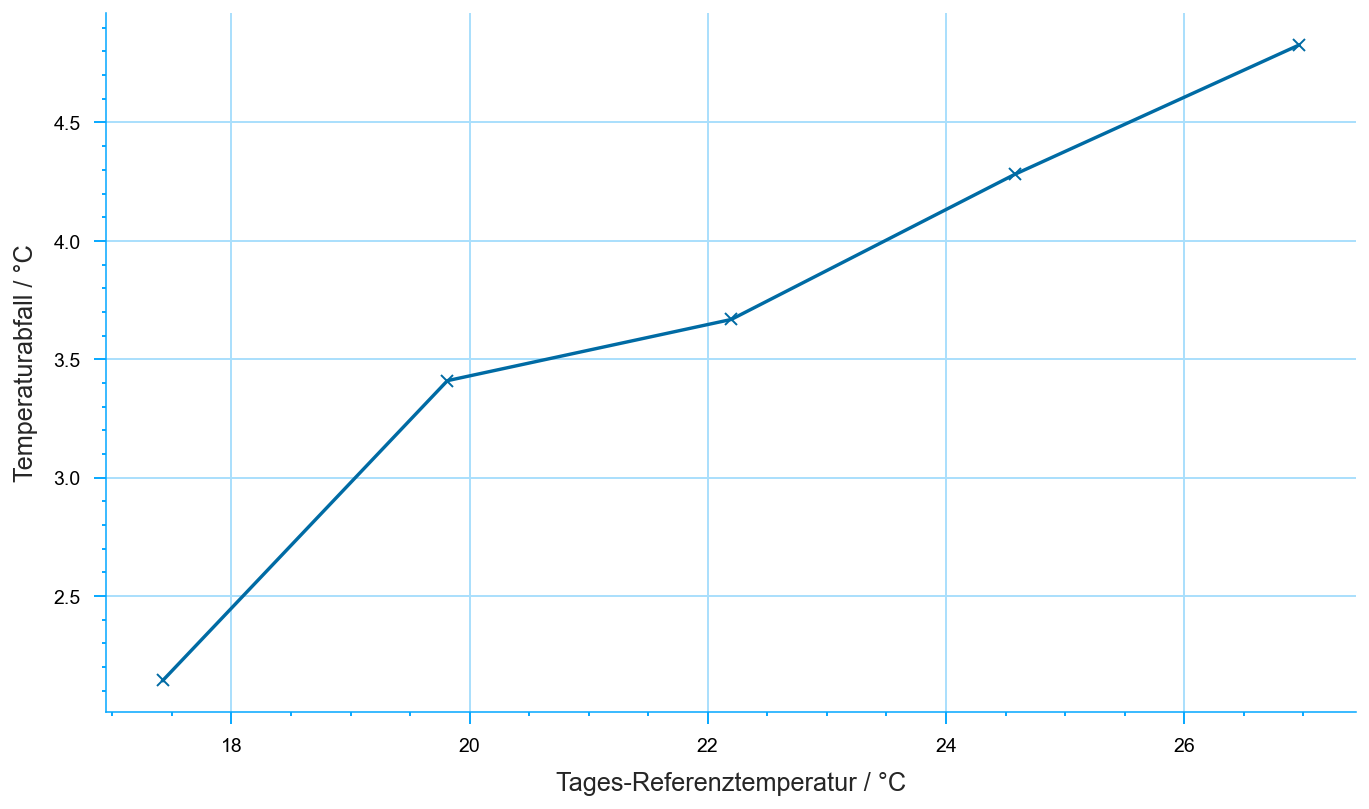

In [353]:
dtd.plot_t_drop(sensor_manual=SENSORS, boxplot=False)

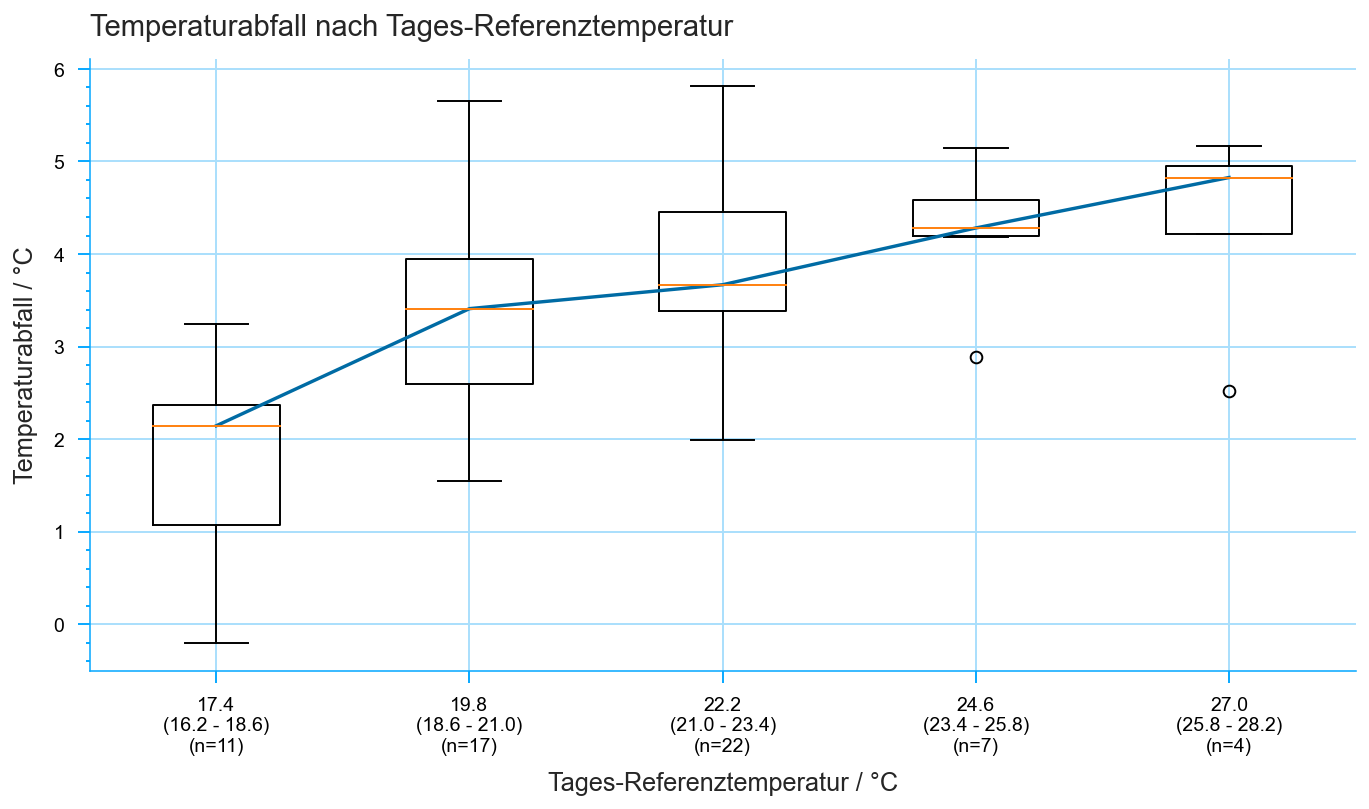

In [320]:
dtd.plot_t_drop(
    sensor_manual=SENSORS,
    #frames=("27-1", "21-1"),
    title="Temperaturabfall nach Tages-Referenztemperatur",
    boxplot_and_line=True,
)

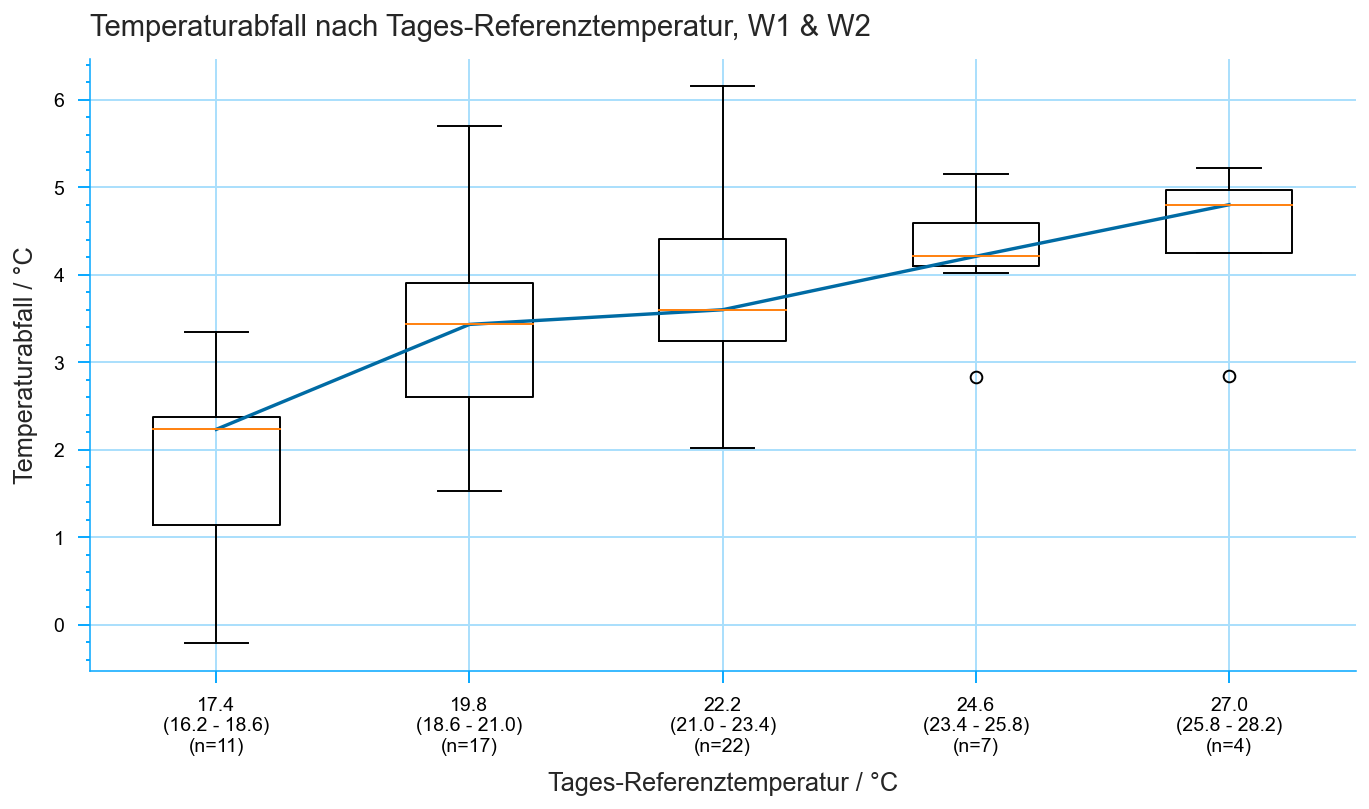

In [321]:
dtd.plot_t_drop(
    sensor_manual=("W1", "W2"),
    #frames=("27-1", "21-1"),
    title="Temperaturabfall nach Tages-Referenztemperatur, W1 & W2",
    boxplot_and_line=True,
)

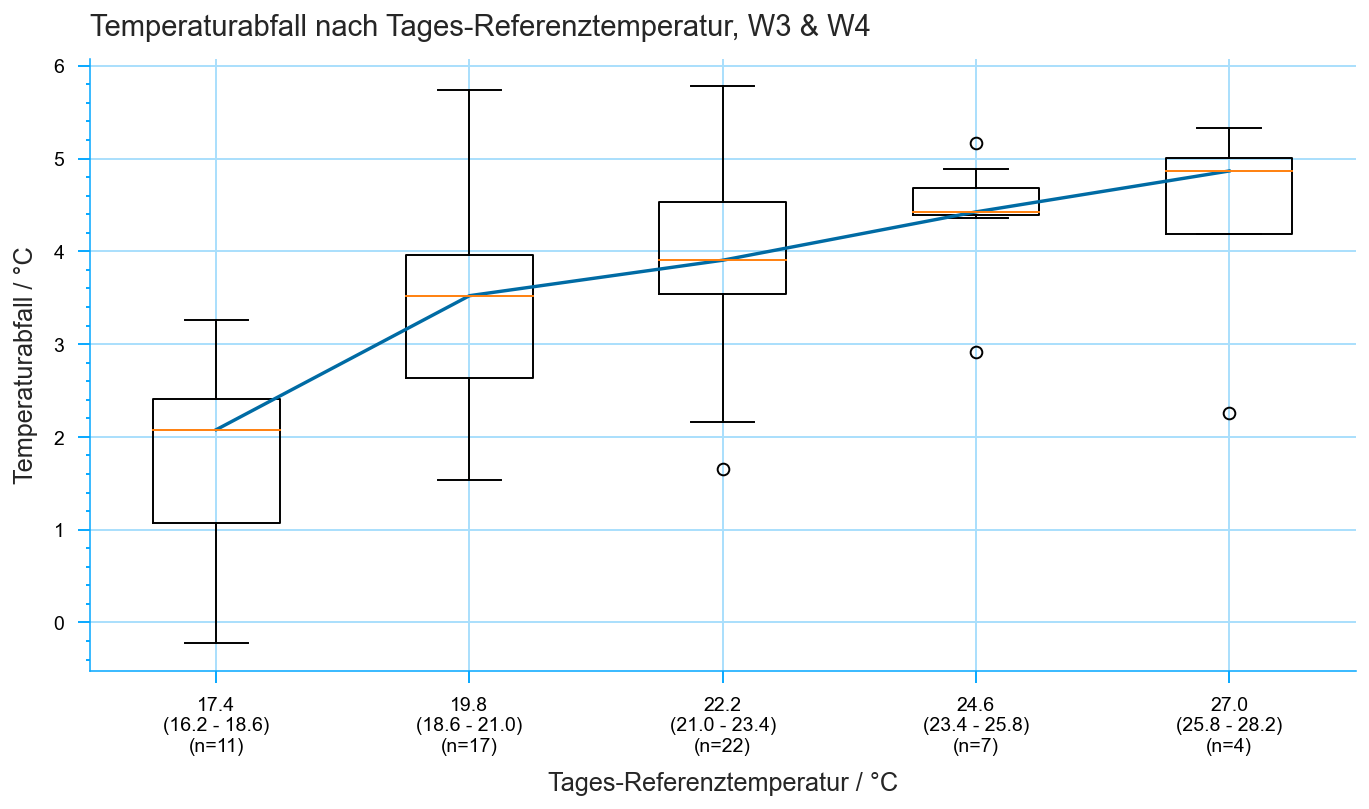

In [322]:
dtd.plot_t_drop(
    sensor_manual=("W3", "W4"),
    #frames=("27-1", "21-1"),
    title="Temperaturabfall nach Tages-Referenztemperatur, W3 & W4",
    boxplot_and_line=True,
)

In [455]:
import seaborn as sns

In [469]:
x.name = "ref temperature"
y.name = "temperature drop"

<AxesSubplot: xlabel='ref temperature', ylabel='temperature drop'>

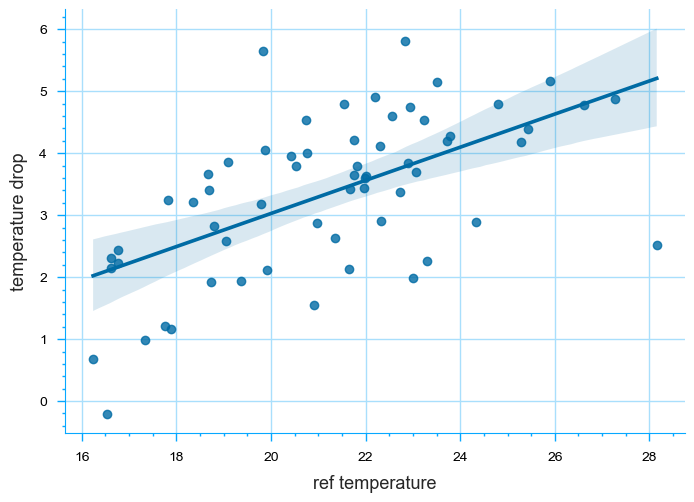

In [470]:
sns.regplot(x=x, y=y)

In [472]:
sns.regplot?

In [383]:
y_backup = y

In [452]:
x.isnull()

2022-07-06    False
2022-07-07    False
2022-07-08    False
2022-07-09    False
2022-07-10    False
              ...  
2022-08-31    False
2022-09-01    False
2022-09-02    False
2022-09-03    False
2022-09-04    False
Name: (binning, default, ref_T), Length: 61, dtype: bool

In [390]:
pd.merge(x.isnull(), y.isnull())

ValueError: Cannot merge a Series without a name

In [343]:
dtd.dateseries.loc[:, ("binning", "default", "ref_T")]

2022-07-05          NaN
2022-07-06    19.085323
2022-07-07    17.815773
2022-07-08    18.657793
2022-07-09    20.532868
                ...    
2022-09-01    16.764727
2022-09-02    16.238717
2022-09-03    16.623652
2022-09-04    19.879783
2022-09-05          NaN
Name: (binning, default, ref_T), Length: 63, dtype: float64

In [380]:
dtd.dateseries.loc[:, (("binning", "W1"), ("default", "21-1"), ("ref_T","T"))].isnull()

sensor,binning,W1
key,default,21-1
unit,ref_T,T
2022-07-05,True,True
2022-07-06,False,False
2022-07-07,False,False
2022-07-08,False,False
2022-07-09,False,False
...,...,...
2022-09-01,False,False
2022-09-02,False,False


In [358]:
dtd.dateseries.loc[
    :,
    (SENSORS, "21-1", "T"),
]

sensor,W1,W2,W3,W4,W5
key,21-1,21-1,21-1,21-1,21-1
unit,T,T,T,T,T
2022-07-05,NaN,NaN,NaN,NaN,NaN
2022-07-06,17.653400,18.05650,18.12525,17.981550,17.97215
2022-07-07,16.090900,16.66910,16.73145,16.794000,17.08765
2022-07-08,16.953450,17.41905,17.54090,17.562700,17.57215
2022-07-09,18.994000,19.56280,19.62835,19.500200,19.62525
...,...,...,...,...,...
2022-09-01,15.547905,15.78785,15.65340,15.657952,15.70960
2022-09-02,14.818762,15.11275,15.12520,15.116333,15.34715


In [359]:
dtd.dateseries[("binning", "default", "ref_T")]

2022-07-05          NaN
2022-07-06    19.085323
2022-07-07    17.815773
2022-07-08    18.657793
2022-07-09    20.532868
                ...    
2022-09-01    16.764727
2022-09-02    16.238717
2022-09-03    16.623652
2022-09-04    19.879783
2022-09-05          NaN
Name: (binning, default, ref_T), Length: 63, dtype: float64

In [ ]:
dtd.pl

In [202]:
dtd.bins["default"]

array([16.22680121, 18.62180833, 21.0049    , 23.38799167, 25.77108333,
       28.154175  ])

In [203]:
dtd.bins["default"][:-1]

array([16.22680121, 18.62180833, 21.0049    , 23.38799167, 25.77108333])

In [20]:
len(dtd.bins["default"])

6

In [47]:
dtd.dateseries.sort_index(inplace=True, axis=1)

In [38]:
for i in range(5):
    print(len(dtd.dateseries[dtd.dateseries[("binning","default", "bin_nr")] == i]))

11
17
22
7
4


In [94]:
subset = dtd.dateseries[dtd.dateseries[("binning","default", "bin_nr")] == 2].loc[:, (("W1", "W2", "W3", "W4"),)]

In [95]:
subset

sensor             W1                                W2                   \
key              21-1             27-1             21-1             27-1   
unit                T count          T count          T count          T   
2022-07-12  20.484600  20.0  15.453400  20.0  20.856450  20.0  15.672100   
2022-07-15  19.897150  20.0  16.706600  20.0  20.506500  20.0  16.987750   
2022-07-16  19.381500  20.0  16.012750  20.0  19.840850  20.0  16.397200   
2022-07-17  20.943714  21.0  16.562762  21.0  21.393190  21.0  16.809762   
2022-07-21  19.910952  21.0  16.410952  21.0  20.473524  21.0  16.732476   
2022-07-23  20.899095  21.0  17.976381  21.0  21.375286  21.0  18.402095   
2022-07-25  21.553905  21.0  19.288952  21.0  21.667000  21.0  19.905048   
2022-07-26  19.756238  21.0  17.288905  21.0  20.238333  21.0  17.690667   
2022-07-27  19.854381  21.0  16.726571  21.0  20.291905  21.0  16.985333   
2022-07-28  20.402000  21.0  16.830571  21.0  20.970476  21.0  17.160905   
2022-07-30  19.521095  21.0  15.500238  21.0  20.205667  21.0  15.979381   
2022-08-05  20.107429  21.0  17.952571  21.0  20.440714  21.0  18.396095   
2022-08-08  20.259238  21.0  16.131286  21.0  20.506190  21.0  16.259190   
2022-08-09  21.253190  21.0  17.247286  21.0  21.399048  21.0  17.547857   
2022-08-10  20.723381  21.0  17.369286  21.0  20.913952  21.0  17.598476   
2022-08-11  21.184762  21.0  17.714571  21.0  21.482429  21.0  17.798000   
2022-08-12  19.922952  21.0  16.333524  21.0  20.074667  21.0  16.666905   
2022-08-13  20.836667  21.0  14.708571  21.0  21.000238  21.0  14.827619   
2022-08-14  20.041905  21.0  15.440762  21.0  20.527095  21.0  15.735333   
2022-08-16  21.217524  21.0  18.872286  21.0  21.535952  21.0  19.440762   
2022-08-24  20.854476  21.0  15.955667  21.0  20.990800  20.0  16.144050   
2022-08-25  21.021143  21.0  16.294810  21.0  21.394100  20.0  16.722050   

sensor                  W3                               W4                   \
key                   21-1            27-1             21-1             27-1   
unit       count         T count         T count          T count          T   
2022-07-12  20.0  20.72525  20.0  15.66905  20.0  20.590800  20.0  15.684650   
2022-07-15  20.0  20.53145  20.0  16.59715  20.0  20.515900  20.0  16.531450   
2022-07-16  20.0  20.00025  20.0  16.10655  20.0  20.015850  20.0  16.159600   
2022-07-17  21.0  21.50970  20.0  16.85650  20.0  21.440900  20.0  16.884550   
2022-07-21  21.0  20.67840  20.0  16.82205  20.0  20.575200  20.0  16.834750   
2022-07-23  21.0  21.54080  20.0  18.42840  20.0  21.340900  20.0  18.362750   
2022-07-25  21.0  21.43770  20.0  19.80020  20.0  21.403400  20.0  19.722150   
2022-07-26  21.0  20.32210  20.0  17.58790  20.0  20.268950  20.0  17.556550   
2022-07-27  21.0  20.35020  20.0  16.60970  20.0  20.322150  20.0  16.625200   
2022-07-28  21.0  20.97520  20.0  17.11270  20.0  20.928350  20.0  17.153350   
2022-07-30  21.0  20.29090  20.0  15.75655  20.0  20.281500  20.0  15.915800   
2022-08-05  21.0  20.35030  20.0  18.30965  20.0  20.519100  20.0  18.237800   
2022-08-08  21.0  20.51895  20.0  16.24720  20.0  20.387850  20.0  16.343950   
2022-08-09  21.0  21.17215  20.0  17.17520  20.0  21.065800  20.0  17.112850   
2022-08-10  21.0  20.80020  20.0  17.11910  20.0  20.743900  20.0  17.168900   
2022-08-11  21.0  21.42845  20.0  17.46270  20.0  21.465850  20.0  17.565900   
2022-08-12  21.0  19.98155  20.0  16.44715  20.0  19.959700  20.0  16.462750   
2022-08-13  21.0  20.74400  20.0  14.88460  20.0  20.719050  20.0  15.025300   
2022-08-14  21.0  20.58155  20.0  15.64705  20.0  20.503400  20.0  15.628400   
2022-08-16  21.0  21.65650  20.0  19.39080  20.0  21.537700  20.0  19.312750   
2022-08-24  20.0  20.89085  20.0  16.31580  20.0  20.812714  21.0  16.262190   
2022-08-25  20.0  21.33460  20.0  16.51905  20.0  21.303762  21.0  16.649048   

sensor            
key               
unit       count  
2022-07-12  20.0  
2022-07-15  20.0  
202

In [70]:
len(subset)

22

In [78]:
subset.columns = subset.columns.droplevel(2)

In [125]:
sub_1 = subset.loc[:, (slice(None), "21-1", "T")].droplevel((1,2,), axis=1)
sub_2 = subset.loc[:, (slice(None), "27-1", "T")].droplevel((1,2,), axis=1)

#sub_1.columns = sub_1.columns.droplevel(1).droplevel(1)
#sub_2.columns = sub_2.columns.droplevel(1).droplevel(1)

y = (sub_1 - sub_2).mean(axis=1)

In [129]:
isinstance((1,), tuple)

True

In [130]:
y

2022-07-12    5.044475
2022-07-15    3.657013
2022-07-16    3.640588
2022-07-17    4.543483
2022-07-21    3.709462
2022-07-23    2.996614
2022-07-25    1.836414
2022-07-26    2.615400
2022-07-27    3.467958
2022-07-28    3.754625
2022-07-30    4.286798
2022-08-05    2.130357
2022-08-08    4.172651
2022-08-09    3.951749
2022-08-10    3.481418
2022-08-11    3.755080
2022-08-12    3.507135
2022-08-13    5.963466
2022-08-14    4.800601
2022-08-16    2.232770
2022-08-24    4.717783
2022-08-25    4.717162
dtype: float64

[3]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa24c7ac400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa24c7ac940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa24c7ac130>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa24c7ace80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa24c7b7160>],
 'means': []}

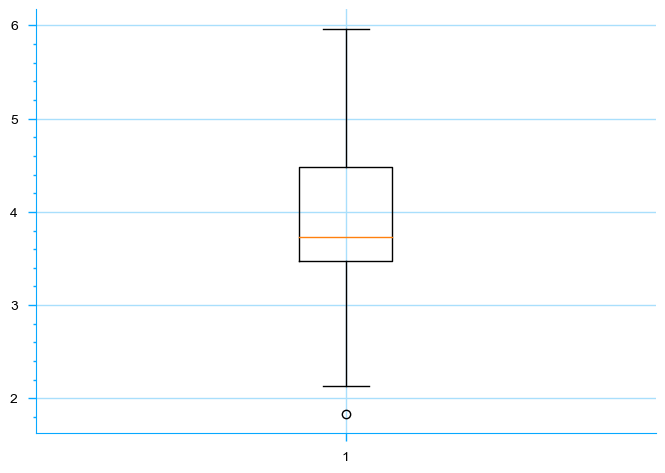

In [124]:
plt.boxplot(y)

<ErrorbarContainer object of 3 artists>

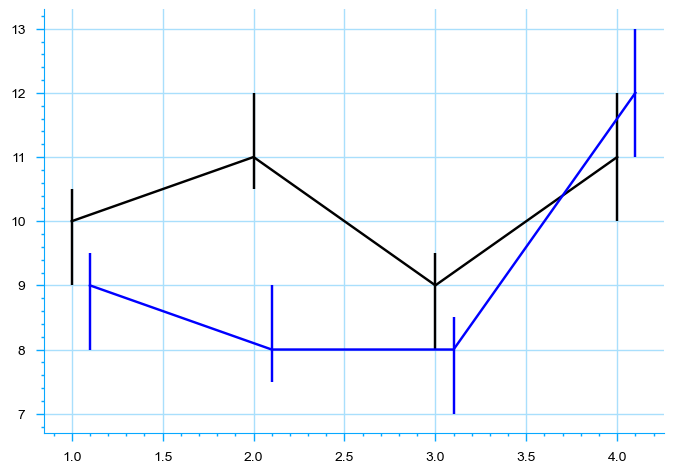

In [49]:
x = np.array((1,2,3,4))
y = np.array((10, 11, 9, 11))
y2 = np.array((9, 8, 8, 12))
yerr = np.array(((1,0.5,1,1),(0.5,1,0.5,1)))

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr, c="black")
ax.errorbar(x+0.1, y2, yerr, c="blue")
